In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

import scipy.io
import time
import glob,os
from scipy import optimize
from pylab import *
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import bz2
import csv
import struct

## Calculate precision from JDDC results

0.94
(0.16063021900077099, 0.13701632373743552)
1.46
(0.18144597716507171, 0.15291469457929763)
0.917
(0.21327150363571395, 0.19713258237544973)
0.874
(0.22570830201029815, 0.216471546521743)
0.928
(0.2815811047136257, 0.1810803861435333)
0.882
(0.15638558851735182, 0.1948507123904044)
0.886
(0.19468615193459984, 0.14657312624272337)
0.881
(0.18779136376270078, 0.14929560175819834)
0.91
(0.226526726009033, 0.17631602386654704)
0.884
(0.14643004406925128, 0.1453823169184006)
0.19744569808184173
0.1697033314533733


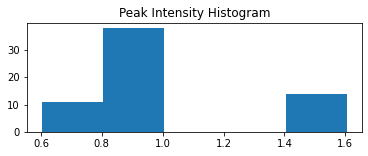

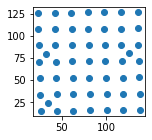

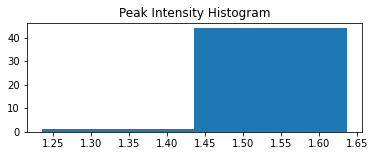

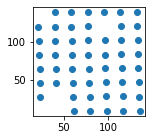

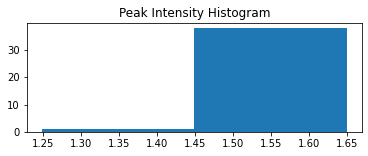

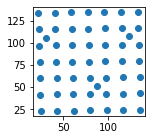

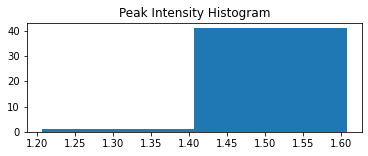

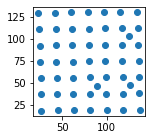

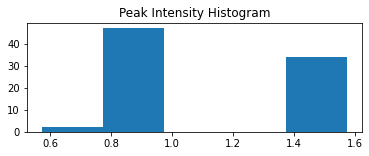

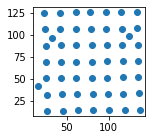

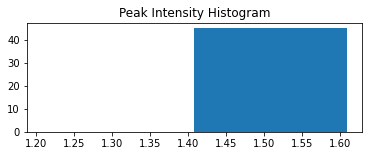

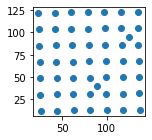

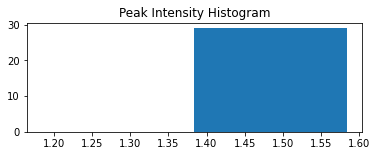

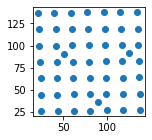

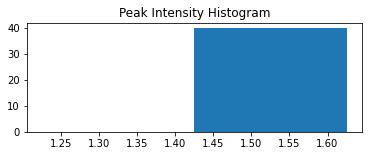

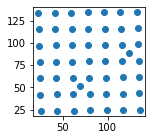

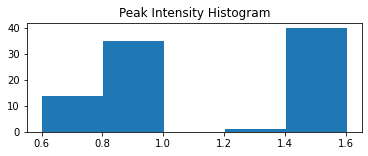

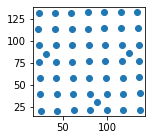

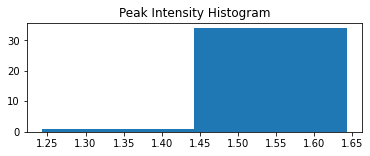

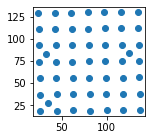

In [61]:
path = 'D:/2020/JDDC/FrameDoseTest/1us/'
list_2 = glob.glob(path + '*Frames*results/')
prec_x_list = np.zeros((len(list_2),1))
prec_y_list = np.zeros((len(list_2),1))
count = 0

for j in range(len(list_2)):
    path_final = list_2[j]
    csvfile = path_final + 'bump-0_001-centers.csv'
    txtfile = path_final + 'bump-0_001.txt'
    prec = FindPrecision(csvfile, txtfile, 0.7, 18)
    print(prec)
    if ~isnan(prec).any():
        prec_x_list[j]=prec[0]
        prec_y_list[j]=prec[1]
print(np.mean(prec_x_list))
print(np.mean(prec_y_list))

In [57]:
print(prec_y_list)

[[0.24843133]
 [0.29722253]
 [0.27864908]
 [0.29834224]
 [0.30203685]
 [0.31464767]
 [0.28010837]
 [0.28112347]
 [0.27395594]
 [0.23213241]]


In [62]:
print(np.mean(prec_x_list))
print(np.mean(prec_y_list))

0.19744569808184173
0.1697033314533733


In [63]:
np.save(path+'prec_x_jddc.npy',prec_x_list)
np.save(path+'prec_y_jddc.npy',prec_y_list)

D:/2020/JDDC/DoseTest_exp/2Frames/Y2Test/50Y2\2Frames_B9_results\
0.7


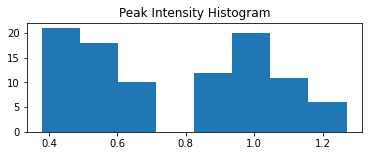

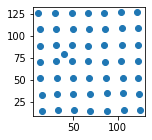

In [19]:
# Test single JDDC fitting result if necessary
j = 7
path_final = list_2[j]
print(path_final)
csvFileName = path_final + 'bump-0_003-centers.csv'
txtFileName = path_final + 'bump-0_003.txt'
separation = 18

start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        peaks_x.append(float(row[0]))
        peaks_y.append(float(row[1]))

with open(txtFileName) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content];

peaks_int = []
for i in range(len(peaks_x)):
    peaks_int.append(float(content[i*3+2]))

array_x = np.asarray(peaks_x)
array_y = np.asarray(peaks_y)
array_int = np.asarray(peaks_int)
index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140) & (array_int>0))
array_x = array_x[index]
array_y = array_y[index]
array_int = array_int[index]

fig = plt.subplots(figsize=(6,2))
plt.hist(array_int, bins='auto')
plt.title('Peak Intensity Histogram')

hist_bin = np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2)
hist, bin_edges = np.histogram(array_int,bins=np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2), density=True)
threshold = bin_edges[argmin(hist)]
threshold = 0.7
print(threshold)
lattice1 = np.where(array_int>threshold)
array_x1 = array_x[lattice1]
array_y1 = array_y[lattice1]
array_int1 = array_int[lattice1]

fig = plt.subplots(figsize=(2,2))
plt.scatter(array_x1,array_y1)

prec_x_list[j]=FindYStd(array_x1,array_y1,separation)
prec_y_list[j]=FindXStd(array_x1,array_y1,separation)

## Plot results

In [47]:
fullpath.split('/')[-1][14:-3]

'0.5'

In [67]:
# Process precision calculated from JDDC and NRR results, calculate average precision and standard deviation
path = 'D:/2020/JDDC/FrameDoseTest/*us/'
folder_list = glob.glob(path)
# Create two arrays to save precision and standard deviation for both jddc and nrr
prec_jddc = np.zeros((len(folder_list),4))
prec_nrr = np.zeros((len(folder_list),4))
# Create an array to save the number of frames
dwelltime = np.zeros((len(folder_list),1))

for ifolder in range(len(folder_list)):
    fullpath = folder_list[ifolder]
    prec_x_list = np.load(fullpath + 'prec_x_jddc.npy')
    prec_y_list = np.load(fullpath + 'prec_y_jddc.npy')
    prec_jddc[ifolder,0] = np.mean(prec_x_list)
    prec_jddc[ifolder,1] = np.std(prec_x_list)
    prec_jddc[ifolder,2] = np.mean(prec_y_list)
    prec_jddc[ifolder,3] = np.std(prec_y_list)
    
    dwelltime[ifolder,0] = float(fullpath.split('/')[-1][14:-3])
    print(fullpath, fullpath.split('/')[-1][14:-3])

D:/2020/JDDC/FrameDoseTest\0.5us\ 0.5
D:/2020/JDDC/FrameDoseTest\12us\ 12
D:/2020/JDDC/FrameDoseTest\1us\ 1
D:/2020/JDDC/FrameDoseTest\2us\ 2
D:/2020/JDDC/FrameDoseTest\6us\ 6
D:/2020/JDDC/FrameDoseTest\8us\ 8


Text(0, 0.5, 'Precision Along Fast Scan (pm)')

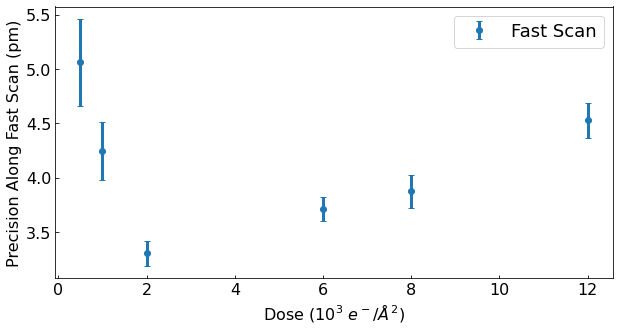

In [68]:
fig, ax1 = plt.subplots(figsize=(10,5))


# Axes1: bottom x axis, for plot, in unit electron dose
ax1.errorbar(dwelltime,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='Fast Scan')
# ax1.errorbar(dwelltime,prec_jddc[:,2]*21.5,yerr = prec_jddc[:,3]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='')
ax1.tick_params(labelsize=16, direction='in')

handles, labels = ax1.get_legend_handles_labels()
legend = ax1.legend(handles[::-1],labels[::-1],fontsize=18)

ax1.set_xlabel('Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax1.set_ylabel('Precision Along Fast Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

# Axis 2, on top, for display only, in unit of number of frames
# ax2 = ax1.twiny()
# ax2.errorbar(nframes,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
# # ax2.set_xticklabels(labels,fontsize=16)
# ax2.tick_params(labelsize=16, direction='in')
# ax2.set_xlabel('Number of frames',fontsize=16)

Text(0, 0.5, 'Precision Along Slow Scan (pm)')

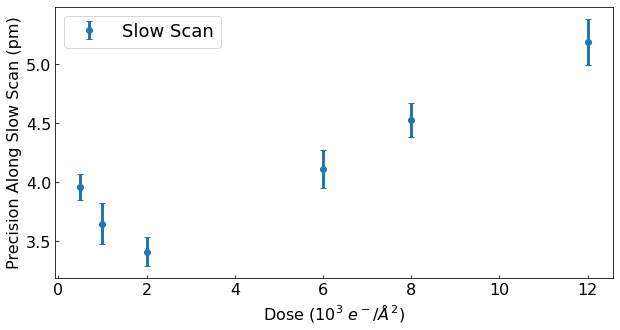

In [70]:
fig, ax1 = plt.subplots(figsize=(10,5))


# Axes1: bottom x axis, for plot, in unit electron dose
# ax1.errorbar(dwelltime,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='Fast Scan')
ax1.errorbar(dwelltime,prec_jddc[:,2]*21.5,yerr = prec_jddc[:,3]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='Slow Scan')
ax1.tick_params(labelsize=16, direction='in')

handles, labels = ax1.get_legend_handles_labels()
legend = ax1.legend(handles[::-1],labels[::-1],fontsize=18)

ax1.set_xlabel('Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax1.set_ylabel('Precision Along Slow Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

# Axis 2, on top, for display only, in unit of number of frames
# ax2 = ax1.twiny()
# ax2.errorbar(nframes,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
# # ax2.set_xticklabels(labels,fontsize=16)
# ax2.tick_params(labelsize=16, direction='in')
# ax2.set_xlabel('Number of frames',fontsize=16)

# JDDC find precision

In [2]:
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))

    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140) & (array_int>0))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
    hist_bin = np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2)

    fig = plt.subplots(figsize=(6,2))
    plt.hist(array_int, bins=hist_bin)
    plt.title('Peak Intensity Histogram')

#     hist, bin_edges = np.histogram(array_int,bins=np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2), density=True)
#     threshold = bin_edges[argmin(hist)]
    threshold = np.sort(array_int)[-53]
    print(threshold)
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]
    
    fig = plt.subplots(figsize=(2,2))
    plt.scatter(array_x1,array_y1)

    return FindXStd(array_x1,array_y1,separation), FindYStd(array_x1,array_y1,separation)

In [3]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
#     fig = plt.subplots(figsize=(6,2))
#     plt.hist(y_sep, bins='auto')
#     plt.title('Hist along y, std= '+str(y_std))
    return y_std

In [4]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
#     fig = plt.subplots(figsize=(6,2))
#     plt.hist(x_sep, bins='auto')
#     plt.title('Hist along x, std= '+str(x_std))
    return x_std

# Functions not in use anymore